In [2]:
import pandas as pd
import psycopg2

# 接続設定
conn = psycopg2.connect(
    host="postgres",
    port=5432,
    dbname="mydb",
    user="myuser",
    password="mypassword"
)

# データ読み込み
df = pd.read_sql_query("SELECT * FROM supermarket_sales", conn)
conn.close()

# 確認
df.head()


/tmp/ipykernel_1155/2984924828.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM supermarket_sales", conn)


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_percent,sales_total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08:00,Ewallet,522.83,4.76,26.14,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29:00,Cash,76.40,4.76,3.82,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03,13:23:00,Credit card,324.31,4.76,16.22,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.29,489.05,2019-01-27,20:33:00,Ewallet,465.76,4.76,23.29,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.21,634.38,2019-02-08,10:37:00,Ewallet,604.17,4.76,30.21,5.3


In [3]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

conn = psycopg2.connect(
    host="postgres",
    port=5432,
    dbname="mydb",
    user="myuser",
    password="mypassword"
)
df = pd.read_sql_query("SELECT * FROM supermarket_sales", conn)
conn.close()
df.head()


/tmp/ipykernel_1155/1734644176.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM supermarket_sales", conn)


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_percent,sales_total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08:00,Ewallet,522.83,4.76,26.14,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29:00,Cash,76.40,4.76,3.82,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03,13:23:00,Credit card,324.31,4.76,16.22,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.29,489.05,2019-01-27,20:33:00,Ewallet,465.76,4.76,23.29,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.21,634.38,2019-02-08,10:37:00,Ewallet,604.17,4.76,30.21,5.3


In [4]:
df.isnull().sum()


invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5_percent              0
sales_total                0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64

In [5]:
df[df['quantity'] <= 0]
df[df['unit_price'] <= 0]
df[df['sales_total'] <= 0]


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_percent,sales_total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating


In [6]:
df.describe()


,unit_price,quantity,tax_5_percent,sales_total,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00,1000.000000,1000.00000
mean,55.672130,5.510000,15.380050,322.967430,307.58738,4.76,15.380050,6.97270
std,26.494628,2.923431,11.709047,245.885557,234.17651,0.00,11.709047,1.71858
min,10.080000,1.000000,0.510000,10.680000,10.17000,4.76,0.510000,4.00000
25%,32.875000,3.000000,5.927500,124.425000,118.49750,4.76,5.927500,5.50000
50%,55.230000,5.000000,12.090000,253.850000,241.76000,4.76,12.090000,7.00000
75%,77.935000,8.000000,22.445000,471.350000,448.90500,4.76,22.445000,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.76,49.650000,10.00000


In [7]:
df['sales_total'].sum()


np.float64(322967.43)

In [8]:
df.groupby('product_line')['sales_total'].sum().sort_values(ascending=False)


product_line
Food and beverages        56144.96
Sports and travel         55123.00
Electronic accessories    54337.64
Fashion accessories       54306.03
Home and lifestyle        53861.96
Health and beauty         49193.84
Name: sales_total, dtype: float64

/tmp/ipykernel_1155/2866165688.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sales_total', y='product_line', estimator=sum, ci=None)


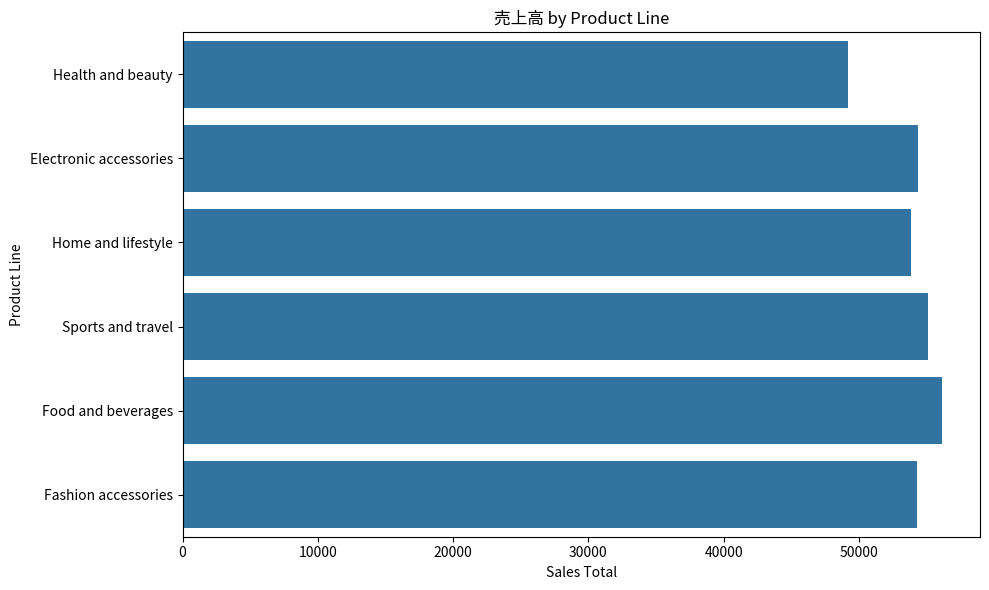

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Noto Sans CJK JP'  # ← 日本語フォントを指定

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='sales_total', y='product_line', estimator=sum, ci=None)
plt.title('売上高 by Product Line')
plt.xlabel('Sales Total')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()


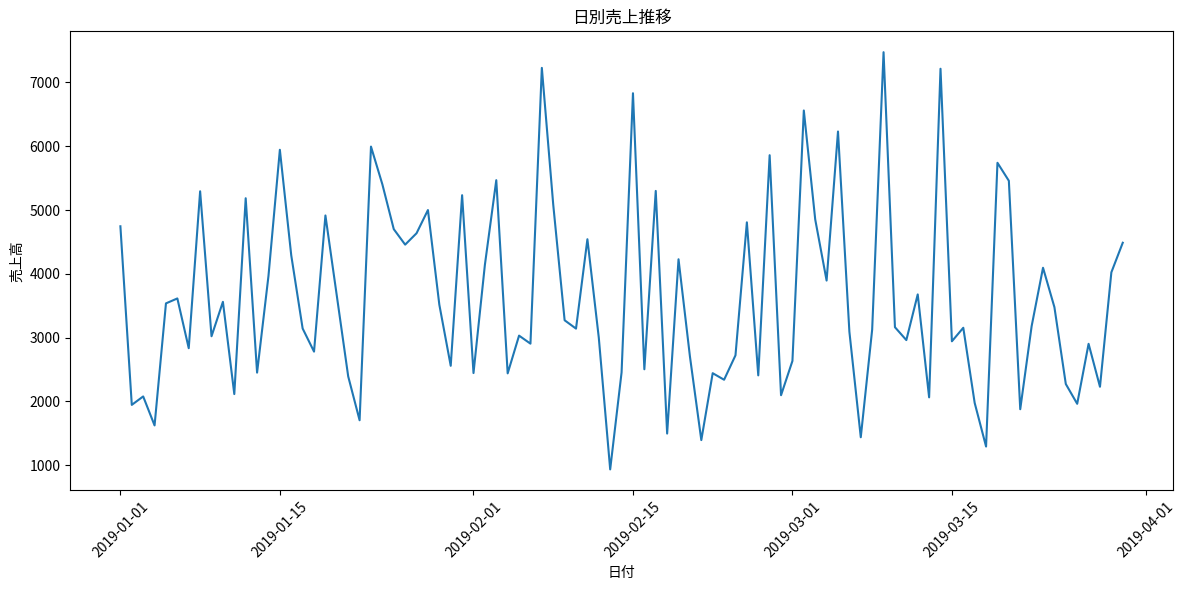

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 日本語フォント指定（DockerでNoto Sansを入れている前提）
plt.rcParams['font.family'] = 'Noto Sans CJK JP'

# 日付をdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# 日別売上集計
daily = df.groupby('date')['sales_total'].sum().reset_index()

# 折れ線グラフの描画
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily, x='date', y='sales_total')
plt.title('日別売上推移')
plt.xlabel('日付')
plt.ylabel('売上高')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
df.describe()


,unit_price,quantity,tax_5_percent,sales_total,date,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.00,1000.000000,1000.00000
mean,55.672130,5.510000,15.380050,322.967430,2019-02-14 00:05:45.600000,307.58738,4.76,15.380050,6.97270
min,10.080000,1.000000,0.510000,10.680000,2019-01-01 00:00:00,10.17000,4.76,0.510000,4.00000
25%,32.875000,3.000000,5.927500,124.425000,2019-01-24 00:00:00,118.49750,4.76,5.927500,5.50000
50%,55.230000,5.000000,12.090000,253.850000,2019-02-13 00:00:00,241.76000,4.76,12.090000,7.00000
75%,77.935000,8.000000,22.445000,471.350000,2019-03-08 00:00:00,448.90500,4.76,22.445000,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.76,49.650000,10.00000
std,26.494628,2.923431,11.709047,245.885557,NaN,234.17651,0.00,11.709047,1.71858


In [15]:
print(df['date'].min())
print(df['date'].max())


2019-01-01 00:00:00
2019-03-30 00:00:00


In [16]:
df['date'].dt.year.value_counts().sort_index()


date
2019    1000
Name: count, dtype: int64

/tmp/ipykernel_1155/1233309324.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='product_line', order=df['product_line'].value_counts().index, palette='viridis')


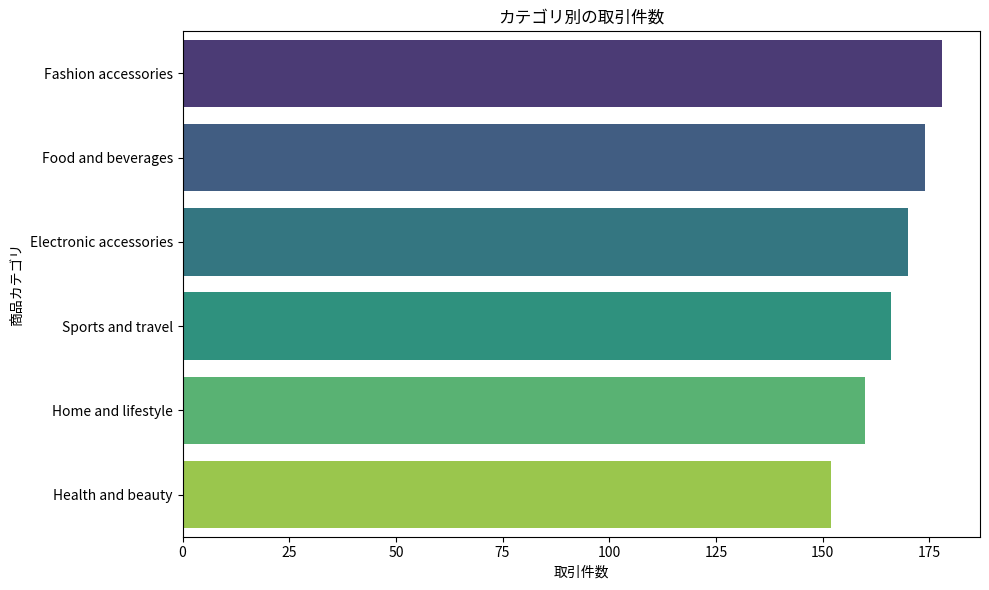

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='product_line', order=df['product_line'].value_counts().index, palette='viridis')
plt.title('カテゴリ別の取引件数')
plt.xlabel('取引件数')
plt.ylabel('商品カテゴリ')
plt.tight_layout()
plt.show()


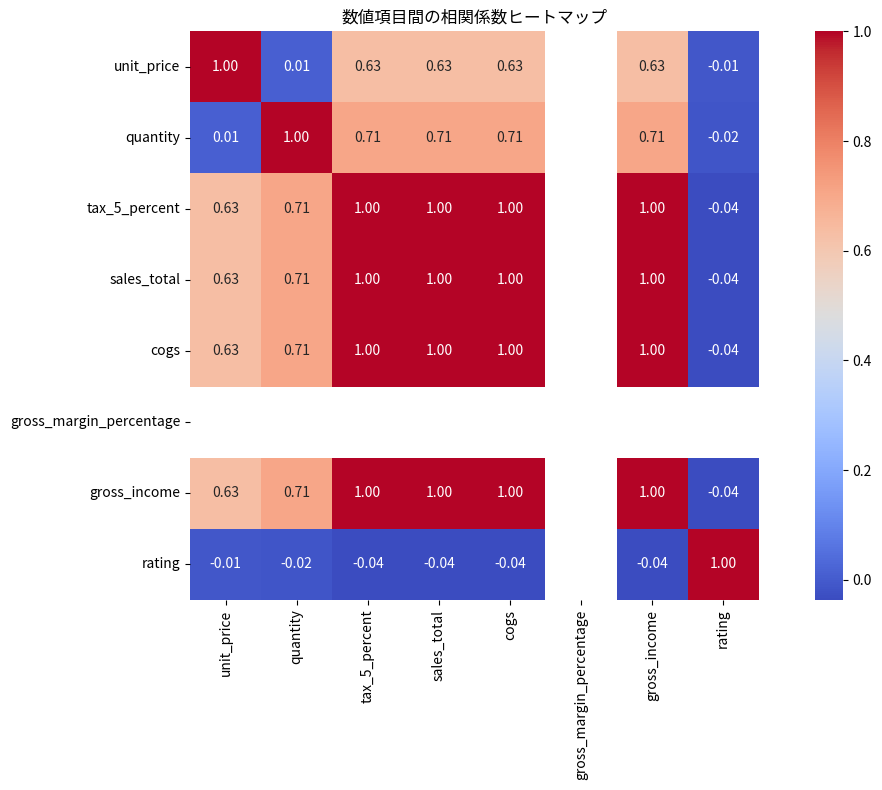

In [18]:
plt.figure(figsize=(12, 8))
correlation = df.select_dtypes(include='number').corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('数値項目間の相関係数ヒートマップ')
plt.tight_layout()
plt.show()


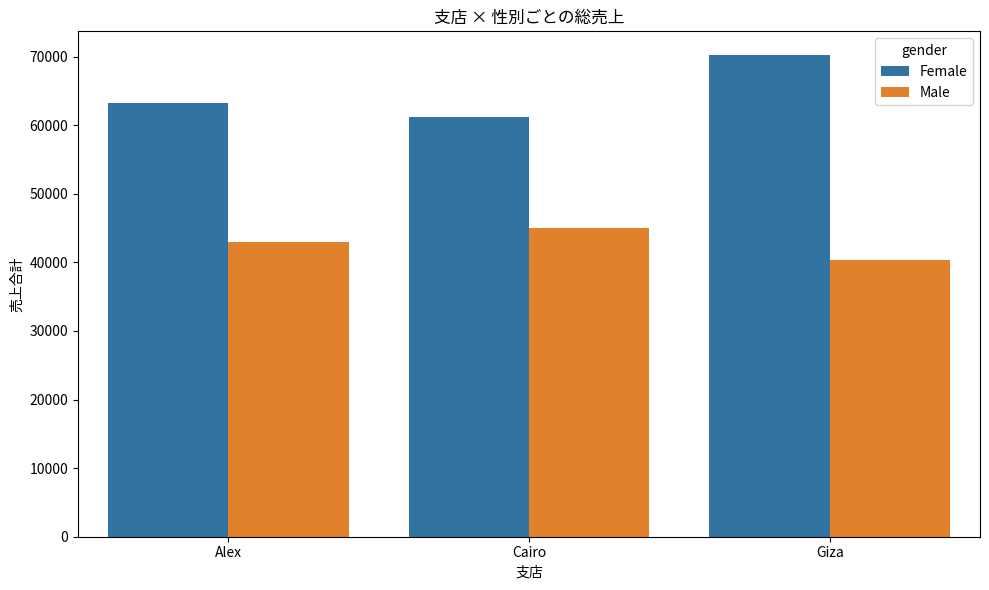

In [19]:
# 性別と支店別の売上比較
gender_branch_sales = df.groupby(['gender', 'branch'])['sales_total'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_branch_sales, x='branch', y='sales_total', hue='gender')
plt.title('支店 × 性別ごとの総売上')
plt.ylabel('売上合計')
plt.xlabel('支店')
plt.tight_layout()
plt.show()



/tmp/ipykernel_1155/3329844886.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_sales, x='payment', y='sales_total', palette='pastel')


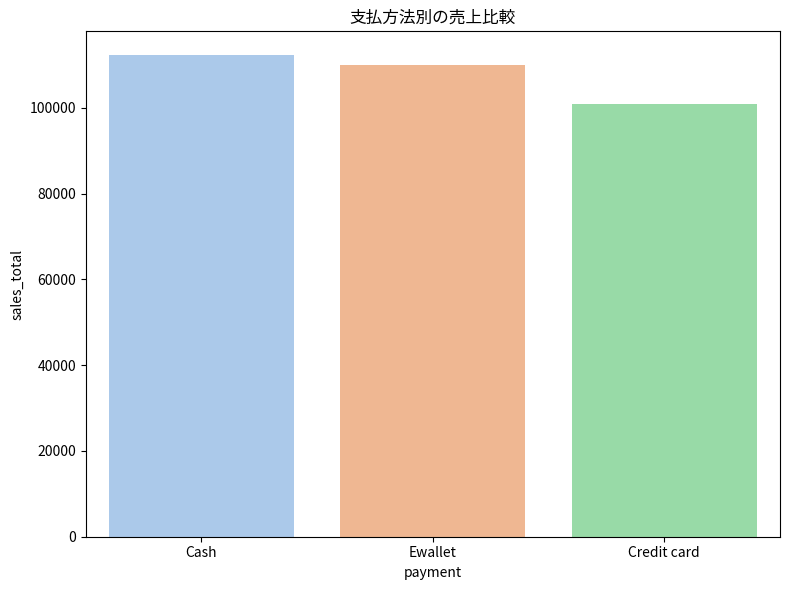

In [20]:
# 支払方法ごとの売上比較
payment_sales = df.groupby('payment')['sales_total'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=payment_sales, x='payment', y='sales_total', palette='pastel')
plt.title('支払方法別の売上比較')
plt.tight_layout()
plt.show()


/tmp/ipykernel_1155/2092328640.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_avg, x='customer_type', y='sales_total', palette='Set2')


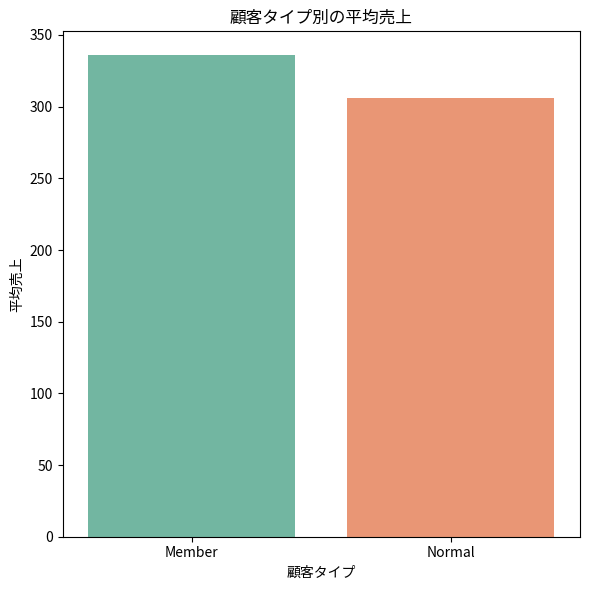

In [21]:
customer_avg = df.groupby('customer_type')['sales_total'].mean().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(data=customer_avg, x='customer_type', y='sales_total', palette='Set2')
plt.title('顧客タイプ別の平均売上')
plt.ylabel('平均売上')
plt.xlabel('顧客タイプ')
plt.tight_layout()
plt.show()


In [22]:
File > Export Notebook As > Export as Python (.py)


SyntaxError: invalid syntax (1267276437.py, line 1)